In [5]:
from bggcomplex import *
import numpy as np

In [6]:
BGG = BGGComplex("A4")
BGG.find_cycles();

In [7]:
Solver = BGGMapSolver(BGG,BGG.zero_root)

In [8]:
Solver.solve(parallel=False);

In [9]:
print(Solver.timer)

{'index': 0.0015370845794677734, 'vect': 0.12047910690307617, 'basis': 0.11267685890197754, 'mult': 0.19974565505981445, 'linalg': 0.5085864067077637}


In [10]:
Solver.check_maps()

checked 1556 cycles, with no problems found!


In [11]:
BGG.compute_signs()

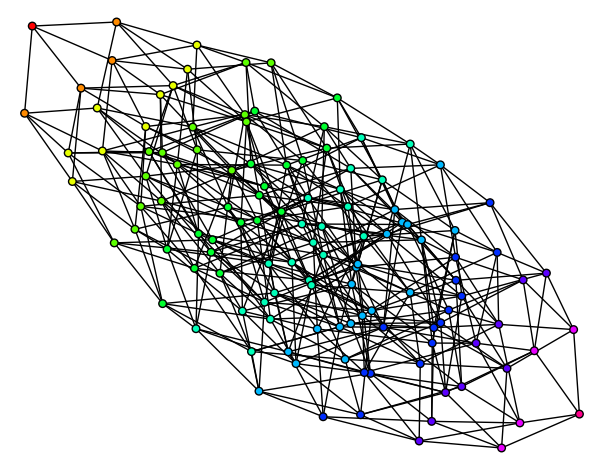

In [12]:
BGG.plot_graph().plot()

In [13]:
roots=BGG.W.domain().simple_roots()
roots

Finite family {1: (1, -1, 0, 0, 0), 2: (0, 1, -1, 0, 0), 3: (0, 0, 1, -1, 0), 4: (0, 0, 0, 1, -1)}

In [14]:
dom = BGG.W.domain()
cr= dom.coroot_lattice()

In [15]:
fun=dom.fundamental_weights_from_simple_roots()
fun

Finite family {1: (4/5, -1/5, -1/5, -1/5, -1/5),  2: (3/5, 3/5, -2/5, -2/5, -2/5),  3: (2/5, 2/5, 2/5, -3/5, -3/5),  4: (1/5, 1/5, 1/5, 1/5, -4/5)}

In [16]:
dom.simple_coroots()

Finite family {1: (1, -1, 0, 0, 0), 2: (0, 1, -1, 0, 0), 3: (0, 0, 1, -1, 0), 4: (0, 0, 0, 1, -1)}

In [17]:
[BGG._weight_to_tuple(r) for r in fun.values()]

[[4/5, 3/5, 2/5, 1/5],
 [3/5, 6/5, 4/5, 2/5],
 [2/5, 4/5, 6/5, 3/5],
 [1/5, 2/5, 3/5, 4/5]]

In [18]:
dom = BGG.W.domain()
dom.simple_coroots()

Finite family {1: (1, -1, 0, 0, 0), 2: (0, 1, -1, 0, 0), 3: (0, 0, 1, -1, 0), 4: (0, 0, 0, 1, -1)}

In [19]:
dom.simple_roots()

Finite family {1: (1, -1, 0, 0, 0), 2: (0, 1, -1, 0, 0), 3: (0, 0, 1, -1, 0), 4: (0, 0, 0, 1, -1)}

In [20]:
BGG._tuple_to_weight([1,1,1/2])

(1, 0, -1/2, -1/2, 0)

In [21]:
mu=fun[1]

In [22]:
mu = BGG.zero_root

In [23]:
[BGG._tuple_to_weight(BGG.dot_action(w,mu))-mu for w in BGG.W]

[(0, 0, 0, 0, 0),
 (0, 0, -1, 1, 0),
 (0, -1, -1, 2, 0),
 (0, 0, -2, 1, 1),
 (-1, -1, -1, 3, 0),
 (0, -1, -2, 2, 1),
 (-1, -1, -2, 3, 1),
 (0, -2, -2, 2, 2),
 (-1, -2, -2, 3, 2),
 (-2, -2, -2, 3, 3),
 (0, -1, 1, 0, 0),
 (0, -2, 1, 1, 0),
 (0, -2, 0, 2, 0),
 (0, -3, 1, 1, 1),
 (-1, -2, 0, 3, 0),
 (0, -3, 0, 2, 1),
 (-1, -3, 0, 3, 1),
 (0, -3, -1, 2, 2),
 (-1, -3, -1, 3, 2),
 (-2, -3, -1, 3, 3),
 (-1, -1, 2, 0, 0),
 (-1, -2, 2, 1, 0),
 (-2, -2, 2, 2, 0),
 (-1, -3, 2, 1, 1),
 (-2, -2, 1, 3, 0),
 (-2, -3, 2, 2, 1),
 (-2, -3, 1, 3, 1),
 (-3, -3, 2, 2, 2),
 (-3, -3, 1, 3, 2),
 (-3, -3, 0, 3, 3),
 (0, 0, 0, -1, 1),
 (0, 0, -1, -1, 2),
 (0, -1, -1, -1, 3),
 (0, 0, -2, 0, 2),
 (-1, -1, -1, -1, 4),
 (0, -1, -2, 0, 3),
 (-1, -1, -2, 0, 4),
 (0, -2, -2, 1, 3),
 (-1, -2, -2, 1, 4),
 (-2, -2, -2, 2, 4),
 (0, -1, 1, -1, 1),
 (0, -2, 1, -1, 2),
 (0, -2, 0, -1, 3),
 (0, -3, 1, 0, 2),
 (-1, -2, 0, -1, 4),
 (0, -3, 0, 0, 3),
 (-1, -3, 0, 0, 4),
 (0, -3, -1, 1, 3),
 (-1, -3, -1, 1, 4),
 (-2, -3, -1, 2, 4)

In [24]:
def is_dot_regular(mu):
    stab_counter = 0
    for w in BGG.W:
        if w.action(mu+BGG.rho)-BGG.rho==mu:
            stab_counter+=1
    if stab_counter<=1:
        return True
    else:
        return False

In [25]:
(BGG.rho-fun[1]).is_dominant()

True

In [26]:
mu=(5*BGG.simple_roots[1]+6*BGG.simple_roots[2]+5*BGG.simple_roots[3])
print(mu.is_dominant())
print(BGG.is_dot_regular(mu))

False
True


In [27]:
BGG.make_dominant(mu)

(
                   [0 1 0 0 0]
                   [1 0 0 0 0]
                   [0 0 1 0 0]
                   [0 0 0 1 0]
(4, 1, 1, -1, -5), [0 0 0 0 1]
)

In [28]:
e = list(BGG.LA.basis())[0]
f = list(BGG.LA.basis())[1]
e

E[alpha[4]]

In [31]:
t=list(list(elt)[0][0])[0][0]

In [32]:
BGG.PBW_alg_gens
BGG.LA.basis()
pbw_to_la={str(value):BGG.LA.basis()[key] for key,value in dict(BGG.PBW_alg_gens).items()}
pbw_to_la

{'PBW[-alpha[1] - alpha[2] - alpha[3] - alpha[4]]': E[-alpha[1] - alpha[2] - alpha[3] - alpha[4]],
 'PBW[-alpha[1] - alpha[2] - alpha[3]]': E[-alpha[1] - alpha[2] - alpha[3]],
 'PBW[-alpha[1] - alpha[2]]': E[-alpha[1] - alpha[2]],
 'PBW[-alpha[1]]': E[-alpha[1]],
 'PBW[-alpha[2] - alpha[3] - alpha[4]]': E[-alpha[2] - alpha[3] - alpha[4]],
 'PBW[-alpha[2] - alpha[3]]': E[-alpha[2] - alpha[3]],
 'PBW[-alpha[2]]': E[-alpha[2]],
 'PBW[-alpha[3] - alpha[4]]': E[-alpha[3] - alpha[4]],
 'PBW[-alpha[3]]': E[-alpha[3]],
 'PBW[-alpha[4]]': E[-alpha[4]],
 'PBW[alpha[1] + alpha[2] + alpha[3] + alpha[4]]': E[alpha[1] + alpha[2] + alpha[3] + alpha[4]],
 'PBW[alpha[1] + alpha[2] + alpha[3]]': E[alpha[1] + alpha[2] + alpha[3]],
 'PBW[alpha[1] + alpha[2]]': E[alpha[1] + alpha[2]],
 'PBW[alpha[1]]': E[alpha[1]],
 'PBW[alpha[2] + alpha[3] + alpha[4]]': E[alpha[2] + alpha[3] + alpha[4]],
 'PBW[alpha[2] + alpha[3]]': E[alpha[2] + alpha[3]],
 'PBW[alpha[2]]': E[alpha[2]],
 'PBW[alpha[3] + alpha[4]]': E[alph

In [33]:
for e in BGG.LA.basis():
    result=0
    for term,coefficient in elt:
        sub_result=e
        for factor,power in term:
            for _ in range(power):
                sub_result=BGG.LA.bracket(pbw_to_la[str(factor)],sub_result)
        result+=sub_result
    print(e,result)

(E[alpha[4]], 0)
(E[alpha[3]], 0)
(E[alpha[2]], 0)
(E[alpha[1]], 0)
(E[alpha[3] + alpha[4]], 0)
(E[alpha[2] + alpha[3]], -3*E[-alpha[2] - alpha[3]])
(E[alpha[1] + alpha[2]], 0)
(E[alpha[2] + alpha[3] + alpha[4]], 0)
(E[alpha[1] + alpha[2] + alpha[3]], 0)
(E[alpha[1] + alpha[2] + alpha[3] + alpha[4]], 0)
(h1, 0)
(h2, 0)
(h3, 0)
(h4, 0)
(E[-alpha[4]], 0)
(E[-alpha[3]], 0)
(E[-alpha[2]], 0)
(E[-alpha[1]], 0)
(E[-alpha[3] - alpha[4]], 0)
(E[-alpha[2] - alpha[3]], 0)
(E[-alpha[1] - alpha[2]], 0)
(E[-alpha[2] - alpha[3] - alpha[4]], 0)
(E[-alpha[1] - alpha[2] - alpha[3]], 0)
(E[-alpha[1] - alpha[2] - alpha[3] - alpha[4]], 0)


In [34]:
def universal_enveloping_algebra_action(pbw_elt,e):
    result=0
    for term,coefficient in pbw_elt:
            sub_result=e
            for factor,power in term:
                for _ in range(power):
                    sub_result=BGG.LA.bracket(factor,sub_result)
            result+=sub_result
    return result

We want to implement the $U(\mathfrak g)$ action on the module
$$
    M_i^j=\bigoplus{}_{r=0}^{j+\frac k2}\left(\left(\bigodot{}^{j+\frac k2-r}\mathfrak u \right)\otimes\left(\bigwedge^r\mathfrak g\right)\otimes\left(\bigwedge{}^{j+\frac k2}\mathfrak n \right) \right)
$$
For this we need two things, one is finding a basis of this module, and second we define the action on it. Unfortunately I can't find a good out of the box implementation for either of these, so we are going to have to do it ourselves. Ideally we can use this to extend sage a little bit. 

Sagemath has a class FreeModuleTensor, it can deal with alternating and symmetric tensors. But it specifically says it can not deal with tensor products of different modules, whereas that is precisely what we need. We should investigate how this class work, and extend it with this functionality. Besides, that module seems to focus on doing stuff without a specific basis. We want to do everything in a basis, because the whole point is to compute a basis. 

We should make an instance of CombinatorialFreeModule

In [73]:
gbasis_dict = {str(i):r for i,r in enumerate(BGG.LA.basis().keys())}
root_to_index = {r:i for i,r in gbasis_dict.items()}
root_to_index

{-alpha[1]: '17',
 -alpha[1] - alpha[2]: '20',
 -alpha[1] - alpha[2] - alpha[3]: '22',
 -alpha[1] - alpha[2] - alpha[3] - alpha[4]: '23',
 alpha[1]: '3',
 alpha[1] + alpha[2]: '6',
 alpha[1] + alpha[2] + alpha[3]: '8',
 alpha[1] + alpha[2] + alpha[3] + alpha[4]: '9',
 -alpha[2]: '16',
 -alpha[2] - alpha[3]: '19',
 -alpha[2] - alpha[3] - alpha[4]: '21',
 alpha[2]: '2',
 alpha[2] + alpha[3]: '5',
 alpha[2] + alpha[3] + alpha[4]: '7',
 -alpha[3]: '15',
 -alpha[3] - alpha[4]: '18',
 alpha[3]: '1',
 alpha[3] + alpha[4]: '4',
 -alpha[4]: '14',
 alpha[4]: '0',
 alphacheck[1]: '10',
 alphacheck[2]: '11',
 alphacheck[3]: '12',
 alphacheck[4]: '13'}

In [37]:
dom = BGG.W.domain()
dom.positive_roots()

[(1, -1, 0, 0, 0),
 (1, 0, -1, 0, 0),
 (0, 1, -1, 0, 0),
 (1, 0, 0, -1, 0),
 (0, 1, 0, -1, 0),
 (0, 0, 1, -1, 0),
 (1, 0, 0, 0, -1),
 (0, 1, 0, 0, -1),
 (0, 0, 1, 0, -1),
 (0, 0, 0, 1, -1)]

In [38]:
BGG.LA.an_element()

E[alpha[4]] + E[alpha[3]] + E[alpha[2]] + E[alpha[1]] + h1 + h2 + h3 + h4 + E[-alpha[4]] + E[-alpha[3]] + E[-alpha[2]] + E[-alpha[1]]

# Lie algebra modules

In [39]:
f_roots=list(BGG.lattice.negative_roots())
e_roots=list(BGG.lattice.positive_roots())
h_roots=BGG.lattice.alphacheck().values()

In [40]:
n_basis=[root_to_index[r] for r in f_roots]
u_basis=[root_to_index[r] for r in e_roots]
g_basis=gbasis_dict.keys()

In [41]:
M1 = CombinatorialFreeModule(ZZ,g_basis)
M2 = CombinatorialFreeModule(ZZ,u_basis)
M3 = CombinatorialFreeModule(ZZ,n_basis)

In [42]:
from sympy.utilities.iterables import variations,subsets
list(variations(n_basis,2,repetition=True));

In [43]:
list(subsets(n_basis,3,repetition=True));

Maybe it's better to create a Lie algebra module class. It should be an extension of combinatorial free module. It should have as one of the properties the Lie algebra acting on it, together with what the action is concretely. Then we can make some functions that take these modules and e.g. take tensor products of them to create new ones. I think it should be fine to store the action as a dictionary or a 3d tensor (probably the former since the 3d tensor is bound to be sparse)

On the other hand it might be much more efficient to store the action just as a function taking (g,m) to g.m

Adding arguments to element constructors does not seem the way to go. We should store the actions in a different way. Perhaps we can make a good constructor for tensor products. Ideally the result should be the same class. 

In [262]:
from sage.modules.with_basis.indexed_element import IndexedFreeModuleElement
#class LieAlgebraModuleElement(IndexedFreeModuleElement):
#    def __init__(self, parent, x, action):
#         self.action=action
#         super(LieAlgebraModuleElement,self).__init__(self, parent,x)
#    def _lmul_(self, c):
#         return self.action(c)
#    def _add_(self, other):
#         return self.parent()(self.x + other.x)

class LieAlgebraModule(CombinatorialFreeModule):
    #Element=LieAlgebraModuleElement
    
    @staticmethod
    def __classcall_private__(cls,base_ring,basis_keys,lie_algebra,action,*options):
        if isinstance(basis_keys, (list, tuple)):
            basis_keys = FiniteEnumeratedSet(basis_keys)
        return super(LieAlgebraModule,cls).__classcall__(cls,base_ring,basis_keys,lie_algebra,action,*options)
    
    def __init__(self,base_ring,basis_keys,lie_algebra,action):
        self.lie_algebra = lie_algebra
        self._index_action = action
        self.basis_keys = basis_keys
        super(LieAlgebraModule,self).__init__(base_ring,basis_keys=basis_keys)
        
    def action(self,X,m):
        assert isinstance(X,self.lie_algebra.element_class)
        assert isinstance(m,self.element_class)
        total = self.zero()
        for i,c in m.monomial_coefficients().iteritems():
            term = c*sum(d*self.basis()[j] for j,d in self._index_action(X,i).items())
            
            #this line is necessary because sage fails to convert the zero in the rational field to the zero in the ring
            #when term is zero, this is because we take the sum over an empty list, so sage doesn't know 
            #what kind of this instance this is, and defaults to a rational number
            if isinstance(term,self.element_class):
                total+=term
        return total
        
        
    def direct_sum(*modules):
        sum_basis=[]
        actions=dict()
        for i,module in enumerate(modules):
            sum_basis+=zip([i]*len(module.basis_keys),module.basis_keys)
            actions[i]=module._index_action
        def action(X,m):
            return add_index(m[0],actions[m[0]](X,m[1]))
        return LieAlgebraModule(modules[0].base_ring(),sum_basis,modules[0].lie_algebra,action)

In [263]:
def lie_alg_to_module_basis(X):
    """Takes an element of the Lie algebra and writes it out as a dict in the module basis"""
    out_dict = {}
    for c,t in X.monomial_coefficients().items():
        out_dict[root_to_index[c]]=t
    return out_dict

def adjoint_action(X,m):
    """Takes X and element of the Lie algebra, and m an index of the basis of the Lie algebra, and outputs 
    the adjoint action of X on the corresponding basis element"""
    bracket =  BGG.LA.bracket(X,BGG.LA.basis()[gbasis_dict[m]])
    return lie_alg_to_module_basis(bracket)

def add_index(i,dic):
    return  {(i,k):v for k,v in dic.items()}

In [264]:
M=LieAlgebraModule(QQ,n_basis,BGG.LA,adjoint_action)

In [267]:
d_sum=M.direct_sum(M,M).direct_sum(M)
d_sum.action(BGG.LA.f()[3],2*d_sum.an_element())

-4*B[(0, (0, '19'))]